# Part B) generate word vectors using word2vec gensim library.

In [60]:
import gensim
import pandas as pd

In [61]:
import warnings
warnings.filterwarnings("ignore")

# Reading file

In [45]:
df = pd.read_csv('../sample_project_1/CSV_FOLDER/tripadvisor_hotel_reviews.csv')

In [46]:
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1


# Preprocessing

In [47]:
review_text = df.Review.apply(gensim.utils.simple_preprocess)

# Creating and training model

In [ ]:
model = gensim.models.Word2Vec(
    window=10,
    min_count=1,
    workers=4,
)

In [49]:
model.build_vocab(review_text)

In [50]:
model.train(review_text, total_examples=model.corpus_count, epochs=model.epochs)

(9570538, 10561815)

# Similar Words

In [51]:
model.wv.most_similar('good')

[('decent', 0.7665025591850281),
 ('great', 0.7462190389633179),
 ('excellent', 0.7128331661224365),
 ('ok', 0.6404658555984497),
 ('fine', 0.6199246644973755),
 ('liked', 0.6139003038406372),
 ('average', 0.6060952544212341),
 ('nice', 0.5791223049163818),
 ('excelllent', 0.568266749382019),
 ('better', 0.5672742128372192)]

In [52]:
model.wv.most_similar('car')

[('parked', 0.849319338798523),
 ('rental', 0.8390176296234131),
 ('garage', 0.7916251420974731),
 ('driving', 0.7632863521575928),
 ('valet', 0.7614509463310242),
 ('cars', 0.7505087852478027),
 ('hire', 0.7331176400184631),
 ('parking', 0.7237375378608704),
 ('enterprise', 0.7234598398208618),
 ('cabs', 0.7234298586845398)]

# Finding Similarity

In [53]:
model.wv.similarity(w1="great", w2="good")

0.746219

In [54]:
model.wv.similarity(w1="car", w2="cab")

0.7068039

# Creating Scatter Plot

In [55]:
keys=['car','good','hotel','view','deal']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word,_ in model.wv.most_similar(word):
        words.append(similar_word)
        embeddings.append(model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [56]:
embedding_clusters

[[array([ 0.43224764,  0.14718342,  0.8853715 ,  0.67749983,  0.79468054,
         -1.9282244 , -1.1079077 , -0.6202275 , -0.6698344 , -0.53477615,
          0.03477201,  0.3435089 , -0.18182446,  0.12374449, -0.17140803,
          0.15402968, -0.5026152 ,  0.17839508, -0.1173768 , -0.70737475,
          0.2696486 ,  1.2036115 , -0.1442487 , -0.6325272 ,  0.5191632 ,
         -1.034131  , -0.68519413, -0.34373948, -0.37775356, -0.12355033,
          0.05251567,  0.647356  , -1.2191546 , -0.04708871,  0.49995   ,
         -0.13078304, -1.733435  ,  0.5491517 ,  0.07013368, -0.33418715,
         -0.44708392, -0.6958313 ,  0.17231172,  0.5524332 ,  0.38812348,
          0.19092076, -1.1343478 ,  0.78496295, -0.30778056,  0.5052229 ,
         -0.09006426, -0.6168522 ,  0.47757334, -0.00607721, -0.82504433,
          0.9667462 , -0.42457876,  0.2589041 , -0.15303972,  0.65260005,
          0.02453966,  0.9188952 , -1.4488319 , -0.08901124,  0.40658456,
         -0.35895178, -0.65801865,  1.

In [57]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)


In [58]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    #plt.grid(True)
    plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

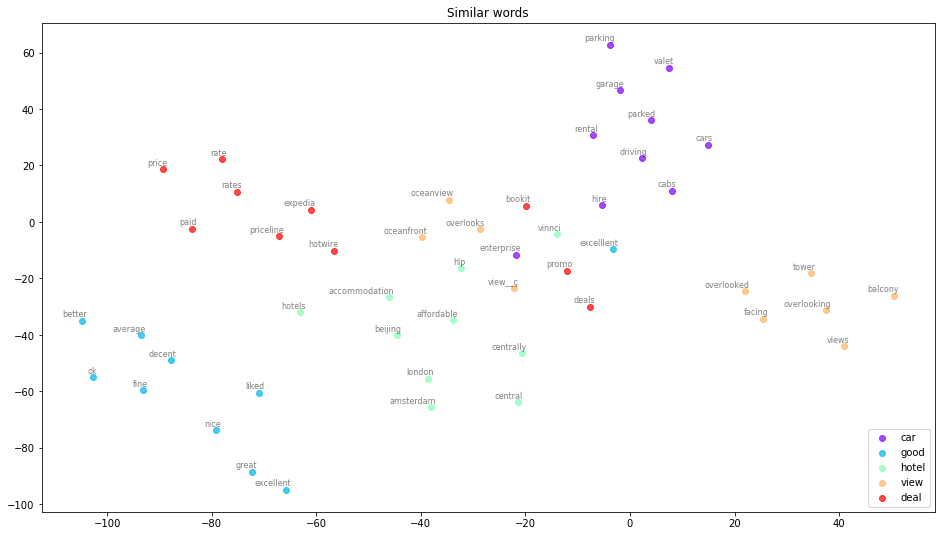

In [62]:
tsne_plot_similar_words('Similar words', keys, embeddings_en_2d, word_clusters, 0.7)